<a href="https://colab.research.google.com/github/rakeshthatiparthi/IPL-2020-Data-Analysis/blob/main/IPL2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [51]:
df=pd.read_csv("/content/sample_data/Deliveries IPL 2020.csv")
df.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1216492,1,MI,CSK,1,1,RG Sharma,Q de Kock,DL Chahar,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
1,1216492,1,MI,CSK,1,2,RG Sharma,Q de Kock,DL Chahar,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
2,1216492,1,MI,CSK,1,3,Q de Kock,RG Sharma,DL Chahar,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN


In [52]:
df.drop(['ball','batsman','non_striker','bowler','wide_runs','bye_runs','legbye_runs','noball_runs','penalty_runs','batsman_runs','extra_runs','player_dismissed','dismissal_kind','fielder'],axis=1,inplace=True)

In [53]:
df.head(3)

,match_id,inning,batting_team,bowling_team,over,is_super_over,total_runs
0,1216492,1,MI,CSK,1,0,4
1,1216492,1,MI,CSK,1,0,1
2,1216492,1,MI,CSK,1,0,2


In [54]:
df.shape

(14326, 7)

**Manhattan and Worm Graph**

Instead of creating manhattan and worm graphs for every match I wrote a function.If we pass the match id to the function it will return the respective graph.

## Manhattan



*   The Manhattan is one of the most popular charts, which shows how a team has scored across the innings.
*   In one glance, we can spot the big overs the batsmen made, the overs where the scoring was less, the periods in the game where they managed to exploit and the effects of losing a wicket on scoring speeds.
*   For Example refer this https://live.cricket.com.au/match/2602/48438/australia-men-vs-india-men-dettol-t20i-series-v-india/graphs


In [55]:
def manhattan_graph(x):
  match_df=df.loc[(df['match_id']== x) & (df['is_super_over']==0)]
  inning1_df=match_df.loc[match_df['inning']== 1]
  inning2_df=match_df.loc[match_df['inning']== 2]
  team1=str(match_df['batting_team'].values[0])
  team2=str(match_df['bowling_team'].values[0])
  match_id=str(match_df['match_id'].values[0])

  team1_total_runs=inning1_df['total_runs'].sum()
  team2_total_runs=inning2_df['total_runs'].sum()
  print(str(team1)+" total runs "+str(team1_total_runs))
  print(str(team2)+" total runs "+str(team2_total_runs))
  
  #inning1
  overs1=inning1_df.groupby('over')['total_runs'].sum().index
  runs1=list(inning1_df.groupby('over')['total_runs'].sum().values)
  newdf1 = pd.DataFrame({'overs':overs1,'runs':runs1})
  newdf1['Team'] = team1
  newdf1['Match_id']= match_id
  

  #inning2
  overs2=inning2_df.groupby('over')['total_runs'].sum().index
  runs2=list(inning2_df.groupby('over')['total_runs'].sum().values)
  newdf2 = pd.DataFrame({'overs':overs2,'runs':runs2})
  newdf2['Team'] = team2
  newdf2['Match_id']= match_id

  final_df=pd.concat([newdf1,newdf2]) #concat the 1st and 2nd inning dataframes
  plt.figure(figsize=(15,5))
  sns.barplot(x='overs', y="runs", hue="Team", data=final_df)
  plt.title("Manhattan Graph of Match")
  plt.ylabel("Runs per Over")
  plt.xlabel("OVER")

  return plt.show()

MI total runs 162
CSK total runs 166


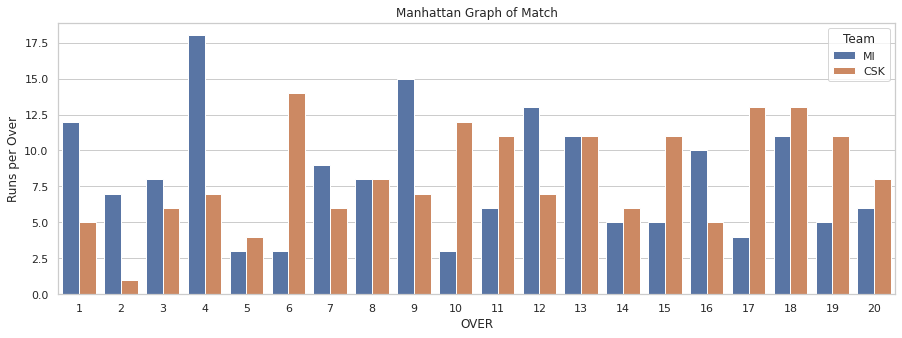

In [56]:
manhattan_graph(1216492)

**Observations**

*   MI team takes the full advantage of the batting powerplay they scored above 7 runs per over in initial 4 overs.
*   CSK scored 5 runs per over from 6th over to 20th over,they rotated the strike constantly





## **Inning wise manhattan graph**

This will be used to analyze the only one inning score per over 

In [57]:
def inning_wise_manhattan(x,y):
  inning_df=df.loc[(df['match_id']==x) & (df['inning']== y) & (df['is_super_over']==0)]
  graph_df=inning_df.groupby('over')['total_runs'].sum()
  total_runs=inning_df['total_runs'].sum()
  x=graph_df.index
  y=graph_df.values
  plt.figure(figsize=(15,5))
  sns.barplot(x=x,y=y)
  val=inning_df['batting_team'].values[0]
  plt.title("Runs per Over Graph of "+val+" Total Score("+str(total_runs)+")")
  plt.ylabel("Runs per Over")
  plt.xlabel("OVER")
  return plt.show()

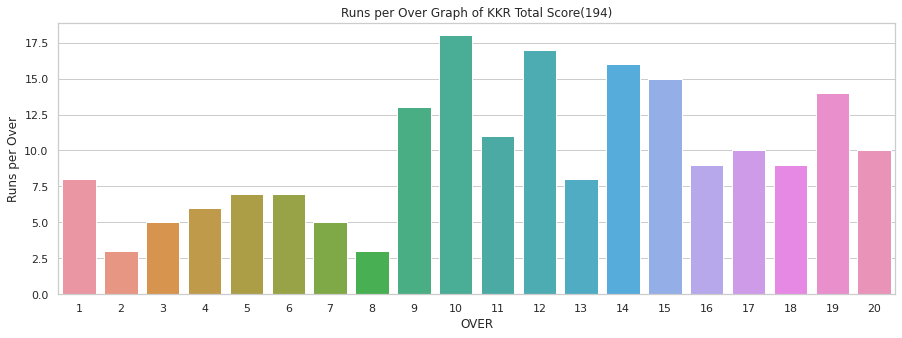

In [58]:
inning_wise_manhattan(1216497,1)

**Observations**

KKR struggled to rotate strike between 1 and 8th over,after 8th over they maintained above 7 runs per over 

## **Worm Graph**

*   Worm is a trend line graph used to show the runs scored by chasing team compared to opponent team.
*   For example refer this https://live.cricket.com.au/match/2602/48438/australia-men-vs-india-men-dettol-t20i-series-v-india/graphs


In [59]:
def worm_graph(x):
  match_df=df.loc[(df['match_id']== x) & (df['is_super_over']==0)]
  inning1_df=match_df.loc[match_df['inning']== 1]
  inning2_df=match_df.loc[match_df['inning']== 2]
  team1=str(match_df['batting_team'].values[0])
  team2=str(match_df['bowling_team'].values[0])
  match_id=str(match_df['match_id'].values[0])
  team1_total_runs=inning1_df['total_runs'].sum()
  team2_total_runs=inning2_df['total_runs'].sum()
  print(str(team1)+" total runs "+str(team1_total_runs))
  print(str(team2)+" total runs "+str(team2_total_runs))

  #inning1
  overs1=inning1_df.groupby('over')['total_runs'].sum().index
  runs1=list(inning1_df.groupby('over')['total_runs'].sum().values)

  inc1=0
  runs_list1=[]
  for i in runs1:
    z1=i+inc1
    runs_list1.append(z1)
    inc1=z1

  newdf1 = pd.DataFrame({'overs':overs1,'runs':runs_list1})
  newdf1['Team'] = team1
  newdf1['Match_id']= match_id

  #inning2
  overs2=inning2_df.groupby('over')['total_runs'].sum().index
  runs2=list(inning2_df.groupby('over')['total_runs'].sum().values)

  inc2=0
  runs_list2=[]
  for j in runs2:
    z2=j+inc2
    runs_list2.append(z2)
    inc2=z2

  newdf2 = pd.DataFrame({'overs':overs2,'runs':runs_list2})
  newdf2['Team'] = team2
  newdf2['Match_id']= match_id

  final_df=pd.concat([newdf1,newdf2])
  plt.figure(figsize=(20,8))
  sns.set_theme(style="whitegrid")
  sns.lineplot(x='overs',y='runs',data=final_df,hue='Team')

  plt.title("Worm Graph of Match")
  plt.ylabel("Total Runs")
  plt.xlabel("Overs")
  return plt.show()

KKR total runs 194
DC total runs 134


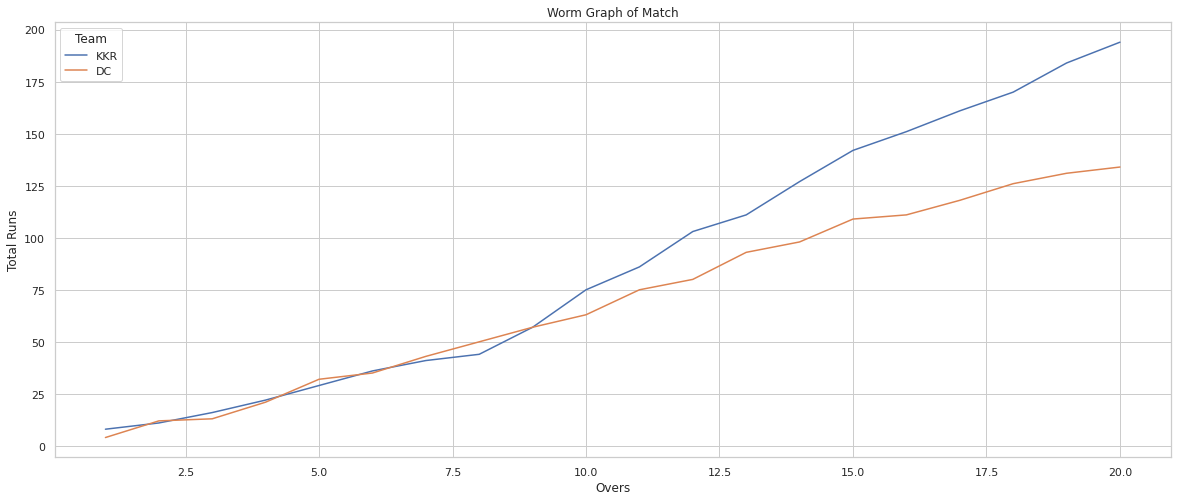

In [60]:
worm_graph(1216497)

**Observations**

DC chasing slows down after 9th over they eventually loss the match

In [61]:
ipl = pd.read_csv("/content/sample_data/Matches IPL 2020.csv")

In [62]:
ipl.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1216492,2020,Abu Dhabi,09/19/2020,MI,CSK,CSK,field,normal,0,CSK,0,5,AT Rayudu,"Sheikh Zayed Stadium, Abu Dhabi",Chris Gaffaney,Virender Sharma,Sundaram Ravi
1,1216493,2020,Dubai (DSC),09/20/2020,DC,KXIP,KXIP,field,tie,0,DC,0,0,MP Stoinis,Dubai International Cricket Stadium,Anil Chaudhary,Nitin Menon,Paul Reiffel


In [63]:
ipl.shape

(60, 18)

In [64]:
ipl.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

In [65]:
ipl.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

## **How many matches played in IPL2020?**


In [66]:
Total_matches=ipl['id'].count()
print("Total Matches held in ipl 2020 season is "+str(Total_matches))

Total Matches held in ipl 2020 season is 60


## **How many matches held in each stadium?**

In [67]:
#Matches played in each venue
ipl['venue'].value_counts()

Dubai International Cricket Stadium    26
Sheikh Zayed Stadium, Abu Dhabi        22
Sharjah Cricket Stadium                12
Name: venue, dtype: int64

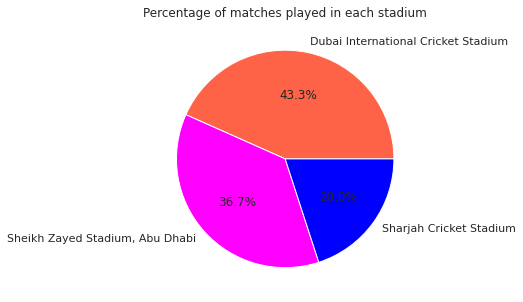

In [68]:
plt.figure(figsize=(5,5))
labels=ipl['venue'].value_counts().index
data=ipl['venue'].value_counts().values
color=['tomato', 'fuchsia', 'blue']
plt.pie(data,labels=labels,colors=color,autopct="%1.1f%%")
plt.title("Percentage of matches played in each stadium")
plt.show()

**Observations**

Dubai International Cricket Stadium hosted 43% matches along with 2 play off matches(including IPL2020 Final between MI vs DC) 

## **How many matches each team played (including playoffs) ?**

In [69]:
ipl_teams=pd.concat([ipl['team1'],ipl['team2']])
ipl_teams.value_counts()

DC      17
SRH     16
MI      16
RCB     15
CSK     14
KKR     14
KXIP    14
RR      14
dtype: int64

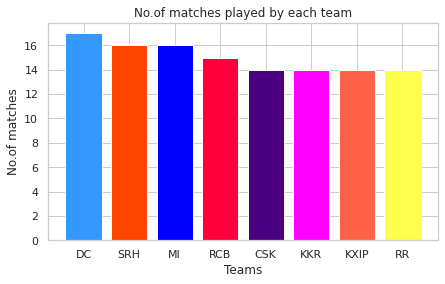

In [70]:
plt.figure(figsize=(7,4))
x=ipl_teams.value_counts().index
y=ipl_teams.value_counts().values
colors=['#3399ff','orangered','blue', '#ff003d',  'indigo',"fuchsia",'tomato','#ffff4d']
plt.bar(x,y,color=colors)
plt.xlabel("Teams")
plt.ylabel("No.of matches")
plt.title("No.of matches played by each team")
plt.show()

**Observations** 

Each team plays 14 matches upto playoffs, but the top 4 teams plays additional playoff matches,here 
*   DC plays total 3 playoff matches including final with MI
*   SRH,MI played two playoff matches
*   RCB played only one playoff match




/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


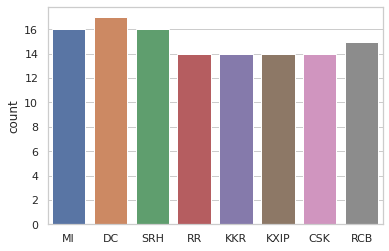

In [71]:
# We can also represent the above barplot using seaborn countplot
sns.countplot(ipl_teams)
plt.show()

## **No. of matches won by each team?**

In [72]:
ipl['winner'].value_counts()

MI      11
DC       9
SRH      8
RCB      7
KKR      7
CSK      6
KXIP     6
RR       6
Name: winner, dtype: int64

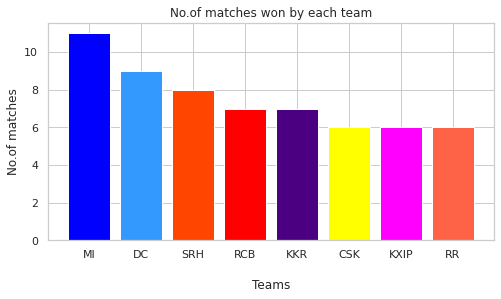

In [73]:
plt.figure(figsize=(8,4))
x=ipl['winner'].value_counts().index
y=ipl['winner'].value_counts().values
color=['blue','#3399ff','orangered', 'red','indigo','yellow',"fuchsia",'tomato']
plt.bar(x,y,color=color)
plt.xlabel("\nTeams")
plt.ylabel("No.of matches")
plt.title("No.of matches won by each team")
plt.show()

**Observations**

MI team won the 11 matches out 16 matches


## **Winning Percentage of teams**

In [25]:
matches_played=pd.concat([ipl['team1'],ipl['team2']])
mp_df=matches_played.value_counts().reset_index()
winner_df=ipl['winner'].value_counts().reset_index()
table_df =pd.merge(mp_df,winner_df,on='index')
table_df.columns=['Team','Total matches','Winner']
table_df['Percentage']=(table_df['Winner'] / table_df['Total matches']) * 100 
table_df

,Team,Total matches,Winner,Percentage
0,DC,17,9,52.941176
1,SRH,16,8,50.000000
2,MI,16,11,68.750000
3,RCB,15,7,46.666667
4,CSK,14,6,42.857143
5,KKR,14,7,50.000000
6,KXIP,14,6,42.857143
7,RR,14,6,42.857143


**Observations**

MI team won 68% of their matches

MI is most winning team in ipl 2020 season

## **Top 7 Most Man of the Match winners**

In [26]:
#Most player_of_match winners
pom=ipl['player_of_match'].value_counts()[:7]
pom

TA Boult          3
KL Rahul          3
RD Gaikwad        3
AB de Villiers    3
AS Yadav          2
SV Samson         2
Anrich Nortje     2
Name: player_of_match, dtype: int64

**Observations**

In top 7 most man of the match winners 4 players are indian cricketers

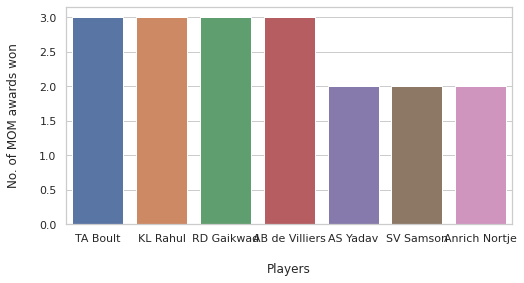

In [27]:
plt.figure(figsize=(8,4))
sns.barplot(x=pom.index, y=pom, orient='v')
plt.ylabel('No. of MOM awards won\n')
plt.xlabel('\nPlayers')
plt.show()

## **Most toss winning teams**

In [28]:
ipl['toss_winner'].value_counts()

SRH     11
DC      10
CSK      8
MI       8
RR       7
RCB      6
KKR      6
KXIP     4
Name: toss_winner, dtype: int64

**Observations**

SRH team won the toss 11 times

Dc team won the toss 10 times

KXIP team won the toss only 4 times in their 14 matches

## **What was the decision taken by captains when they won the toss?**

In [29]:
td=ipl['toss_decision'].value_counts()
td

field    33
bat      27
Name: toss_decision, dtype: int64

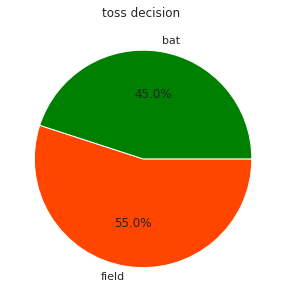

In [30]:
plt.figure(figsize=(5,5))
labels=td.index
data=td.values
color=['orangered','green']
plt.pie(data,labels=labels,colors=color,autopct="%1.1f%%",counterclock=False,pctdistance=0.6)
plt.title("toss decision ")
plt.show()

**Observations**

After winning toss Captains choose bat first in 27 times out of 60 which is 45%, field first in 33 times(55%)

# **Is Toss-winning helped in Match-winning?**

In [31]:
tw=ipl['toss_winner']==ipl['winner']
tw.value_counts()

False    35
True     25
dtype: int64

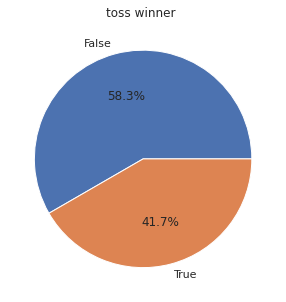

In [32]:
plt.figure(figsize=(5,5))
labels=tw.value_counts().index
data=tw.value_counts().values
plt.pie(data,labels=labels,autopct="%1.1f%%")
plt.title("toss winner ")
plt.show()

**Observations**

toss_winner won the match in 25 instances out of 60 (41.7%)
remaining 35 instances toss_winner failed to capitalize the toss wining advantage(58.3%).
Toss winning in a match give better chance to win the game.

## **The teams with the most number of wins per stadium**

In [33]:
teams_per_venue = ipl.groupby('venue')['winner'].value_counts()
teams_per_venue

venue                                winner
Dubai International Cricket Stadium  CSK       4
                                     DC        4
                                     KXIP      4
                                     RCB       4
                                     SRH       4
                                     MI        3
                                     KKR       2
                                     RR        1
Sharjah Cricket Stadium              DC        3
                                     KXIP      2
                                     MI        2
                                     RR        2
                                     SRH       2
                                     RCB       1
Sheikh Zayed Stadium, Abu Dhabi      MI        6
                                     KKR       5
                                     RR        3
                                     CSK       2
                                     DC        2
                         

**Observations**

CSK won 4 Matches in Dubai stadium,2 matches in Abu Dhabi stadium and didn't won the match in Sharjah  Stadium

Whenevr CSK plays next match in Dubai stadium it gaves confidence to win the game beacause they won it previous games

## **Which umpire has officiated the most number of  matches?**

In [34]:
ipl_umpires=pd.concat([ipl['umpire1'],ipl['umpire2'],ipl['umpire3']])
ipl_umpires.value_counts()

Sundaram Ravi                18
Chris Gaffaney               18
Paul Reiffel                 18
Nitin Menon                  18
KN Ananthapadmanabhan        17
Virender Sharma              16
Anil Chaudhary               16
Richard Illingworth          14
Chettithody Shamshuddin      14
Krishnamachari Srinivasan     6
Ulhas Gandhe                  5
Pashchim Pathak               5
Anil Dandekar                 5
Vineet Kulkarni               5
Yeshwant Barde                5
dtype: int64

**Obseravtions**

Due to COVID-19 pandemic only 15 members officiated IPL 2020 matches,in that 9 umpires officated above 14 matches

## **Results of all the matches**

In [35]:
ipl['result'].value_counts()


normal    56
tie        4
Name: result, dtype: int64

**Observations**


*   56 matches out of 60 has normal result
*   4 matches tie means it leads to super over for conclusive result





## **Is it better to defend or chase in IPL?**

In [36]:
batting_first = ipl[ipl['win_by_runs']!=0]
batting_second = ipl[ipl['win_by_wickets']!=0] 
print("batting first team won "+str(batting_first['id'].count())+" matches")
print("battting second team won "+str(batting_second['id'].count())+" matches")

batting first team won 27 matches
battting second team won 29 matches


**Observations**


*   Batting first team won the matches 27 times
*   Batting second team won the matches 29 times
*   remaining 4 matches result was declared in super over
*   so there are equal opportuinty to won the match for both batting first and batting second teams

## **Best venue for defending score**

In [37]:
batting_first['venue'].value_counts()
#ipl.venue[ipl.win_by_runs!=0].mode()

Dubai International Cricket Stadium    14
Sheikh Zayed Stadium, Abu Dhabi         8
Sharjah Cricket Stadium                 5
Name: venue, dtype: int64

**Observations**

Dubai International Cricket Stadium is best venue to defend score

## **Best venue to chase the target**

In [38]:
batting_second['venue'].value_counts()
#ipl.venue[ipl.win_by_wickets!=0].mode()

Sheikh Zayed Stadium, Abu Dhabi        13
Dubai International Cricket Stadium     9
Sharjah Cricket Stadium                 7
Name: venue, dtype: int64

**Observations**

Sheikh Zayed Stadium, Abu Dhabi is best to chase the target

### **Best score defending teams**

In [39]:
batting_first['winner'].value_counts()
#ipl.winner[ipl.win_by_runs!=0].mode()

DC      6
MI      5
KKR     5
SRH     4
RCB     3
KXIP    2
CSK     1
RR      1
Name: winner, dtype: int64

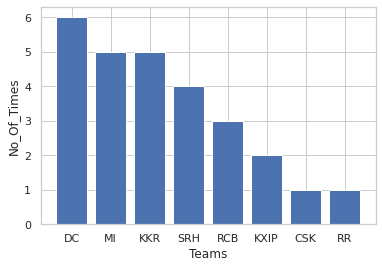

In [40]:
plt.bar(list(batting_first['winner'].value_counts().keys()),list(batting_first['winner'].value_counts()))
plt.xlabel("Teams")
plt.ylabel("No_Of_Times")
plt.show()

### **Best chasing teams**

In [41]:
batting_second['winner'].value_counts()

#ipl.winner[ipl.win_by_wickets!=0].mode()

MI      6
CSK     5
RR      5
SRH     4
RCB     3
KXIP    3
DC      2
KKR     1
Name: winner, dtype: int64

**Observations**

MI team is best in chasing the total compared to other teams out of 11 wins they won 6 matches by chasing. MI batting depth allows them to chase any target put by opponent

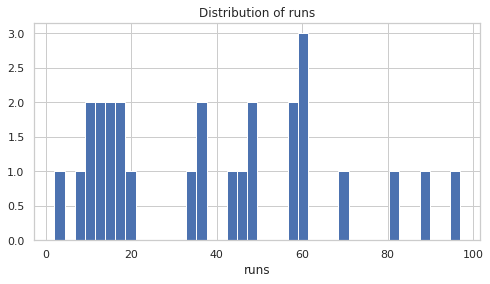

In [42]:
plt.figure(figsize=(8,4))
plt.hist(batting_first['win_by_runs'],bins=40)
plt.title("Distribution of runs")
plt.xlabel("runs")
plt.show()

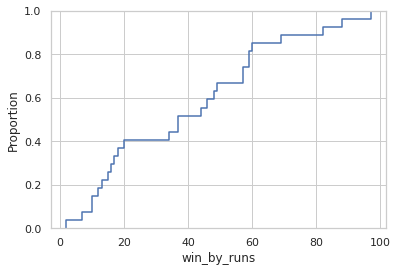

In [43]:
sns.ecdfplot(data=batting_first, x="win_by_runs")
plt.show()

### **Observations**
Batting first team won the match in 27 times out of 60 matches
In that 40% of matches times team won the match by 1 to 20 runs(win_by_runs)

in this 27 matches team battibg first teams has bowled better than batting second

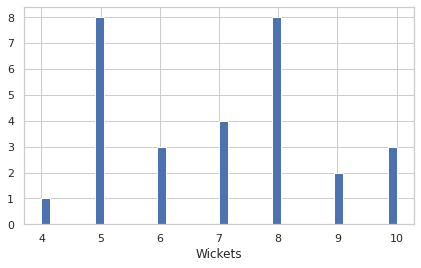

In [44]:
plt.figure(figsize=(7,4))
plt.hist(batting_second['win_by_wickets'],bins=40)
plt.xlabel("Wickets")
plt.show()

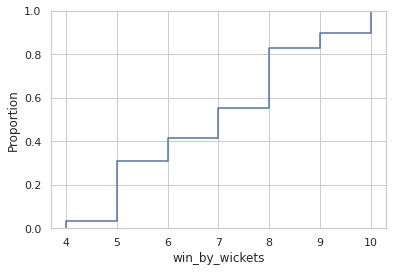

In [45]:
sns.ecdfplot(data=batting_second, x="win_by_wickets")
plt.show()

**Observations**

According the histogram,cdf we conclude that most of the matches won by 4 to 10 wickets which tells us the teams top 6 batsmen chasing the total target through out the season. 

## **Which Team had won by maximum wickets?**

In [46]:
ipl.loc[ipl['win_by_wickets'].idxmax()]['winner']

'CSK'

## **Which Team had won by maximum runs?**

In [47]:
ipl.loc[ipl['win_by_runs'].idxmax()]['winner']

'KXIP'

## **Team Stats**

In [75]:
bf=batting_first['winner'].value_counts().reset_index()
bs=batting_second['winner'].value_counts().reset_index()
bfs=pd.merge(bf,bs,on='index')
bfs.columns=['Team','batting first','batting second']
bfs

,Team,batting first,batting second
0,DC,6,2
1,MI,5,6
2,KKR,5,1
3,SRH,4,4
4,RCB,3,3
5,KXIP,2,3
6,CSK,1,5
7,RR,1,5


In [76]:
team_stat=pd.merge(table_df,bfs,on="Team")
team_stat

,Team,Total matches,Winner,Percentage,batting first,batting second
0,DC,17,9,52.941176,6,2
1,SRH,16,8,50.000000,4,4
2,MI,16,11,68.750000,5,6
3,RCB,15,7,46.666667,3,3
4,CSK,14,6,42.857143,1,5
5,KKR,14,7,50.000000,5,1
6,KXIP,14,6,42.857143,2,3
7,RR,14,6,42.857143,1,5


**Observations**


*   CSK won only one match by batting first,this tells us CSK bowlers failed to restrict opponents.If the bowlers restrict the opponents for atleast 3 matches they would have been in playoffs.
IPL2020 edition they need to concentrate on bowling.
*   DC team played 17 matches won 9 matches, only in 2 matches the chased the target. maybe they lose wickets in chasing the total.